# Klasfyfikacja binarna i perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Klasyfikacja liniowa

SIECI NEURONOWE -- KLOCKI LEGO budujemy z najprostszych elementów.

Chcemy dokonać klasyfikacji.
Mamy punkty $x_i \in \mathbb{R}^n$ dla których klasy $y_i \in \{0,1\}$.
Mając nowy punkt, chcemy przewidzieć jego klasę.

Klasyfikacja liniowa. Szukamy takiego wektora $v=(v_1,\ldots,v_n)$ by poprawna klasyfikacja była zadana przez
$$
x \to v^T x= v_1x_1+\ldots+v_nx_n \to H(v^Tx),
$$
gdzie $H(r)=\{0\text{ if }r\leq 0, \, 1 \text{ otherwise}\}$ funkcja Heaviside. FUNKCJA AKTYWACJI

Zauważmy, że $H(v^Tx)$ przyjmuje tylko wartości $\{0,1\}$.


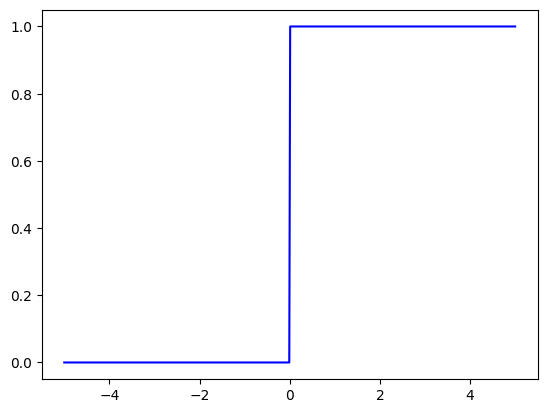

In [ ]:
def heaviside(x):
    """Funkcja Heaviside'a."""
    return np.where(x >= 0, 1, 0)

# Definiowanie zakresu x
x = np.linspace(-5, 5, 500)

# Obliczanie wartości funkcji Heaviside'a
y = heaviside(x)

# Rysowanie wykresu
plt.plot(x, y, label='Heaviside(x)', color='blue')
plt.show()


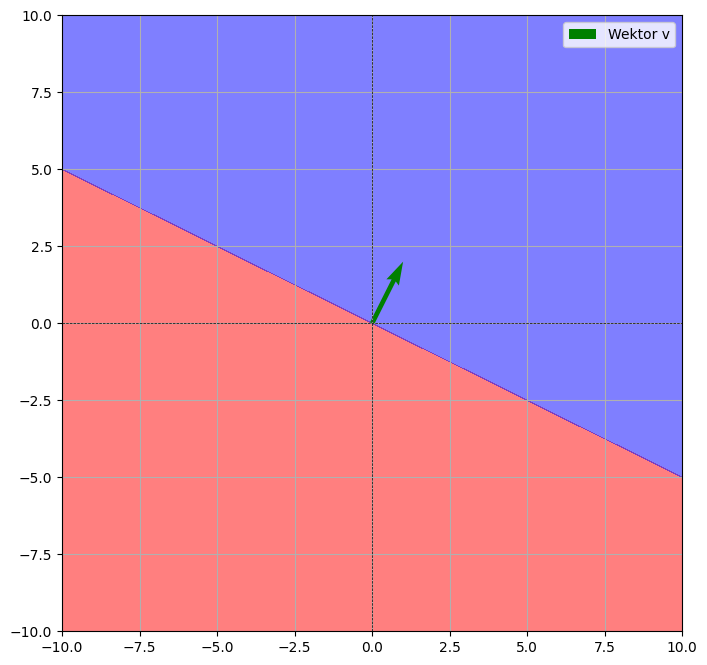

In [ ]:

def visualize_halfspace(v):
    """
    Wizualizuje obszar {x : v^T x > 0} na płaszczyźnie.

    Parameters:
        v (array-like): Wektor o dwóch wymiarach definiujący obszar.
    """
    # Upewnij się, że v jest tablicą numpy
    v = np.array(v)

    if len(v) != 2:
        raise ValueError("Wektor v musi być dwuwymiarowy.")

    # Tworzenie siatki punktów na płaszczyźnie
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    xx, yy = np.meshgrid(x, y)

    # Obliczanie wartości v^T x dla każdego punktu na siatce
    zz = v[0] * xx + v[1] * yy

    # Wizualizacja
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['red', 'blue'], alpha=0.5)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Wektor v na wykresie
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='green', label='Wektor v')

    plt.legend()
    plt.grid()
    plt.show()

# Przykładowe użycie
v = [1, 2]  # Wektor definiujący obszar
visualize_halfspace(v)


Okazuje się, że jeżeli zbiór jest separowalny liniowo, można wypisać jawną strategię uczenia.

## Definicja uczenia perceptronu

Parametry:
* learning rate $=h$ (jak duże updaty robimy)
* epochs $=N$ (ile razy przechodzimy przez cały zbiór)
* losowo wybrany wektora $v$ (można dać na zero) -- wagi sieci.

Uczenie iteracyjne.
* bierzemy $x_i$ o klasie $y_i \in \{0,1\}$
* wyliczamy predykcję modelu $p_i=H(v^Tx_i)$
* Jeżeli punkt $x_i$ jest poprawnie sklasyfikowany, czyli $p_i=y_i$, to nic nie zmieniamy.
* Jeżeli jakiś punkt jest błędnie klasyfikowany, to odpowiednio przesuwamy $v$, jeżeli klasa $x_i$ to jeden, to do $v$ dodajemy $h x_i$, jeżeli $0$ to odejmujemy $h x_i$
[motywacja: zauważmy, że $(v\pm hx_i)^T(x_i)=v^Tx_i \pm h \|x_i\|^2$]

Poprzednie dwa punkty możemy zapisać jako:
  $$
  v =v+h \cdot (y_i-p_i) \cdot x_i.
  $$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# bazowy perceptron bez biasu

"""Funkcja Heaviside'a."""
def heaviside(x):
    return np.where(x >= 0, 1, 0)


"""Perceptron"""
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def predict(self, X):
        return heaviside(np.dot(X, self.weights))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # początkowe wagi ustawiam na zero
        # self.weights = np.zeros(n_features)

        # lepiej jak losowanie wag
        self.weights = np.random.randn(n_features)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                y_predicted = heaviside(np.dot(x_i, self.weights))

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)



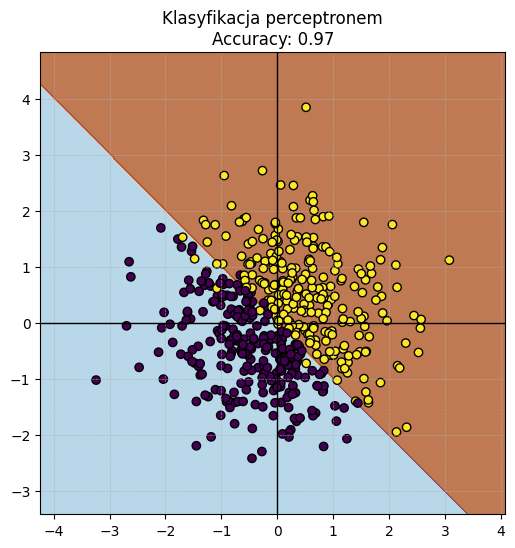

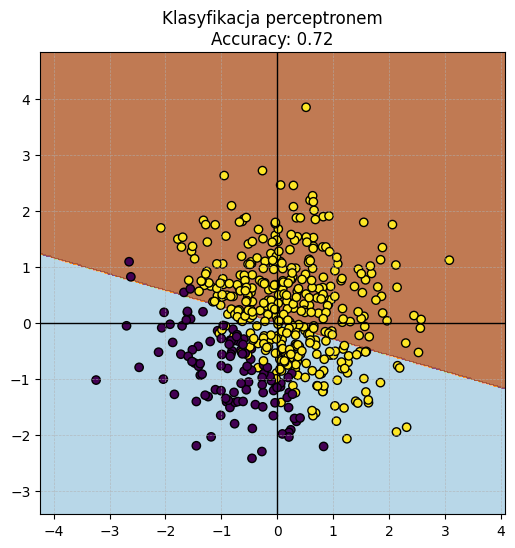

In [ ]:
def wizualizacja(X,y):
  # Trenowanie perceptronu
  perceptron = Perceptron(learning_rate=0.1, epochs=100)
  perceptron.fit(X, y)
  acc = perceptron.accuracy(X, y)

  # Wizualizacja wyników z kolejnymi barierami decyzyjnymi
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  plt.figure(figsize=(6, 6))

  # Ostateczna bariera decyzyjna
  Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  # Punkty danych
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
  plt.axhline(0, color='black', linewidth=1, linestyle='-')
  plt.axvline(0, color='black', linewidth=1, linestyle='-')
  plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.title(f'Klasyfikacja perceptronem\nAccuracy: {acc:.2f}')
  plt.show()

# Generowanie prostych danych
e=0.2
np.random.seed(42)
X = np.random.randn(500, 2)
y = np.array([1 if x[0] + x[1]> np.random.normal(loc=0, scale=e) else 0 for x in X])
wizualizacja(X,y)


# sytuacja gdy nie ma separowalności przez linię przechodzącą przez zero
y = np.array([1 if x[0] + x[1]+1> np.random.normal(loc=0, scale=e) else 0 for x in X])
wizualizacja(X,y)



a co jakby było:

y = np.array([1 if x[0] + x[1] > 0.5+np.random.normal(loc=0, scale=e) else 0 for x in X])


## Rozszerzanie przestrzeni danych by umożliwić barierę postaci
$$
v^Tx+b \leq 0
$$

Rozszerzamy dane z $x$ do $(x,1)$, i na takich rozszerzonych stosujemy model.
W praktyce wagi modelu mają dodatkową współrzędną, nazywamy ją bias.

Wtedy pojawia się update zarówno dla $v$ jak i $b$:
$$
update=h\cdot (y_i -predicted(x_i))
$$
i
$$
weights=weights+h \cdot update \cdot x_i, \, bias=bias+h\cdot update.
$$

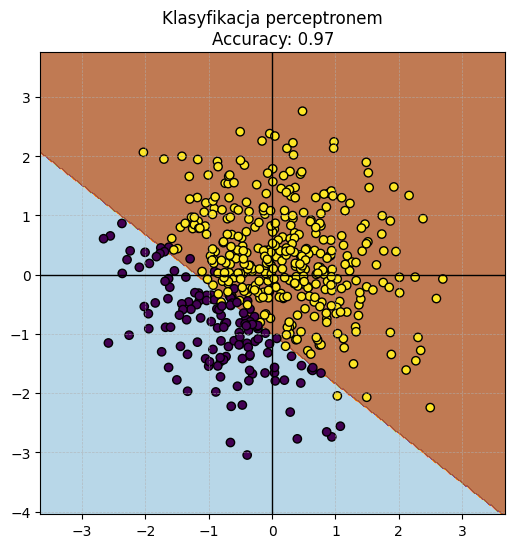

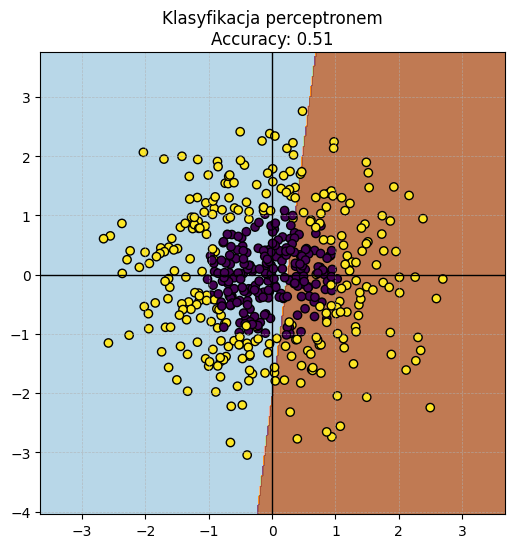

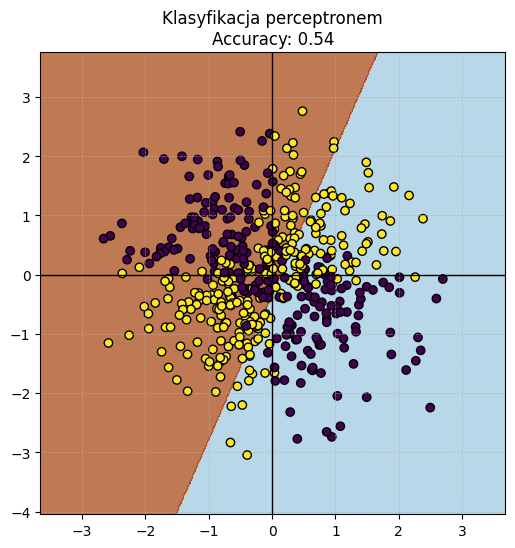

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def predict(self, X):
        return heaviside(np.dot(X, self.weights) + self.bias)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = np.random.rand()

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                y_predicted = heaviside(np.dot(x_i, self.weights) + self.bias)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update *1
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)



# Generowanie prostych danych
e=0.2
np.random.seed(0)

X = np.random.randn(500, 2)
y = np.array([1 if x[0] + x[1] +1> np.random.normal(loc=0, scale=e) else 0 for x in X])
wizualizacja(X,y)

# a co jeżeli koło?
y = np.array([1 if x[0]**2 + x[1]**2 > 1+np.random.normal(loc=0, scale=e) else 0 for x in X])
wizualizacja(X,y)

# XOR data
y = np.array([1 if x[0]*x[1]> np.random.normal(loc=0, scale=e) else 0 for x in X])
wizualizacja(X,y)


Mówimy, że zbiory $X_0,X_1 \subset \mathbb{R}^n$ są separowalne liniowo, jeżeli istnieje $v \in \mathbb{R}^n$ i skalar $b$ taki, że
$$
v^TX_0+b <0, \, v^T X_1+b > 0
$$
Inaczej mówiąc dla każdego $x_i$ mamy
$$
H(v^T x_i+b)=y_i.
$$

Przykład zbioru nie separwoalnego liniowo (rozdzielamy O od X):
$$
\begin{array}{cc}
OX \\
XO
\end{array}
$$

*Twierdzenie* Jeżeli zbiory są separowalne liniowo, to algorytm uczenia perceptronu jest zbieżny do prawidłowego rozwiązania które rozdziela klasy.


# Ocena modelu: zbiór testowy i treningowy, accuracy

Dokładność na zbiorze treningowym: 1.00
Dokładność na zbiorze testowym: 0.98


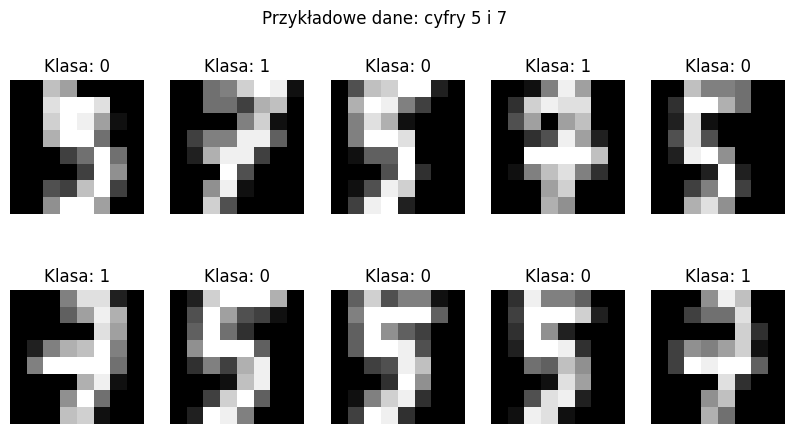

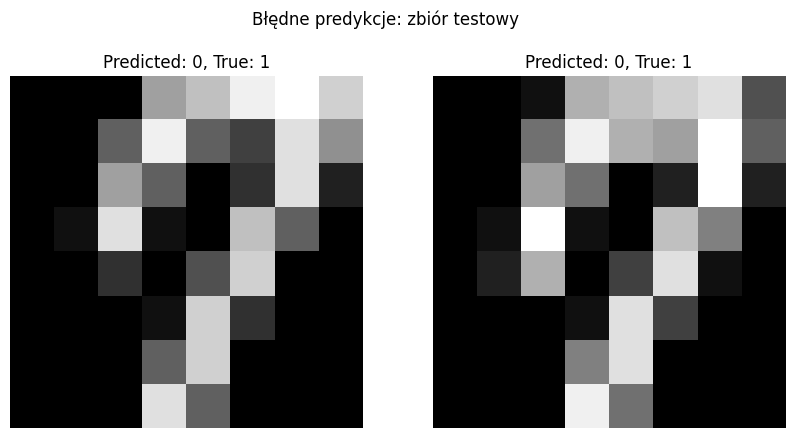

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# wczytujemy zbiór danych digits
from sklearn.datasets import load_digits

# pakiety do dzielenia na train i test oraz do liczenia acc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Wczytanie zbioru danych
digits = load_digits()
X = digits.data
y = digits.target

# Wybór tylko cyfr 5 i 7
# klasa 0 to cyfra 5, klasa 1 to cyfra 7
mask = (y == 5) | (y == 7)
X = X[mask]
y = (y[mask]-5)//2

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trenowanie perceptronu
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, y_train)

# Predykcja
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)

# Obliczanie dokładności
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Dokładność na zbiorze treningowym: {train_acc:.2f}")
print(f"Dokładność na zbiorze testowym: {test_acc:.2f}")

# Identyfikacja błędnych predykcji
train_errors = np.where(y_train != y_train_pred)[0]
test_errors = np.where(y_test != y_test_pred)[0]

# Wizualizacja przykładowych danych
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Przykładowe dane: cyfry 5 i 7")
for ax, image, label in zip(axes.ravel(), X[:10], y[:10]):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.set_title(f"Klasa: {label}")
    ax.axis('off')
plt.show()

# Wizualizacja błędnych predykcji na zbiorze treningowym
if len(train_errors) > 0:
    fig, axes = plt.subplots(1, min(5, len(train_errors)), figsize=(10, 5))
    fig.suptitle("Błędne predykcje: zbiór treningowy")
    if len(train_errors) == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one plot
    for ax, idx in zip(axes, train_errors):
        ax.imshow(X_train[idx].reshape(8, 8), cmap='gray')
        ax.set_title(f"P: {y_train_pred[idx]}, T: {y_train[idx]}")
        ax.axis('off')
    plt.show()

# Wizualizacja błędnych predykcji na zbiorze testowym
if len(test_errors) > 0:
    fig, axes = plt.subplots(1, min(5, len(test_errors)), figsize=(10, 5))
    fig.suptitle("Błędne predykcje: zbiór testowy")
    if len(test_errors) == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one plot
    for ax, idx in zip(axes, test_errors):
        ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
        ax.set_title(f"Predicted: {y_test_pred[idx]}, True: {y_test[idx]}")
        ax.axis('off')
    plt.show()
